In [1]:
# Standard imports
import pathlib

# Third party imports
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib import colors

# Internal imports

In [2]:
# set plot style
%matplotlib widget
plt.style.use('plot_style.txt')

# output path for figures 
output_path = pathlib.Path("/home/jonas/shared/Work/SSeep2026/Figures")

# color palettes
col_vGM = ['#79a6a6', '#48a1b4', '#0098c9', '#008adb', '#5375e0',
           '#9553cf']
cmap_vGM = colors.LinearSegmentedColormap.from_list('vGM', col_vGM)

col_BCB = ['#9ea678', '#a19958', '#a98a39', '#b5761f', '#c25e0f',
           '#cf3a15']
cmap_BCB = colors.LinearSegmentedColormap.from_list('BCB', col_BCB)

#### van Genuchten - Mualem

In [3]:
# load data
df_vGM = pd.read_csv('exp3_vGM/rates.csv', index_col=0)

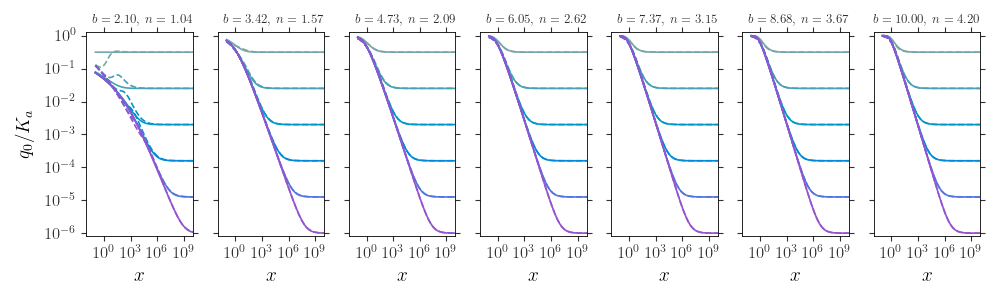

In [4]:
fig, axs = plt.subplots(1, 7, figsize=(10, 3))

df_vGM['cond_ratio'] = df_vGM['aq_cond'] / df_vGM['cl_cond']
cond_ratio = df_vGM['cond_ratio'].unique()
b = df_vGM['b'].unique()

for i1, v1 in enumerate(b):
    for i2, v2 in enumerate(cond_ratio):

        idx = np.logical_and(df_vGM['b'] == v1, df_vGM['cond_ratio'] == v2)

        axs[i1].plot(df_vGM.loc[idx, 'x'], df_vGM.loc[idx, 'q0_ex'], 
                     ls='-', c=col_vGM[i2], zorder=0)
        axs[i1].plot(df_vGM.loc[idx, 'x'], df_vGM.loc[idx, 'q0_ap'], 
                     ls='--', c=col_vGM[i2], zorder=0)


for i1 in range(7):
    axs[i1].spines["top"].set_visible(True)
    axs[i1].spines["right"].set_visible(True)
    axs[i1].tick_params(top=True, right=True)
    axs[i1].set(xscale='log', yscale='log')
    axs[i1].minorticks_off()
    axs[i1].set_ylim(ymin=8e-7, ymax=1.3)
    axs[i1].set_yticks([1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1e0], labels=[])
    axs[i1].set_xlim(xmin=1e-2, xmax=1e10)
    axs[i1].set_xticks([1e0, 1e3, 1e6, 1e9])
    axs[i1].set_xlabel('$x$', labelpad=5)
    axs[i1].set_title(f'$b = {b[i1]:.2f}$, $n = {(2*b[i1]+1)/5:.2f}$', fontsize=9)
axs[0].set_ylabel('$q_0 / K_a$', labelpad=8)
axs[0].set_yticklabels(['$10^{-6}$', '$10^{-5}$', '$10^{-4}$', '$10^{-3}$',
                        '$10^{-2}$', '$10^{-1}$', '$10^0$'])

plt.tight_layout()
#plt.savefig(output_path / 'q0_approx_vGM.pdf')

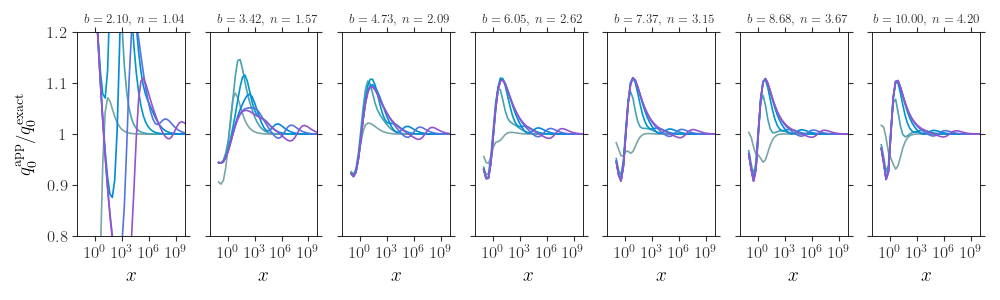

In [5]:
fig, axs = plt.subplots(1, 7, figsize=(10, 3))

df_vGM['cond_ratio'] = df_vGM['aq_cond'] / df_vGM['cl_cond']
cond_ratio = df_vGM['cond_ratio'].unique()
b = df_vGM['b'].unique()

for i1, v1 in enumerate(b):
    for i2, v2 in enumerate(cond_ratio):

        idx = np.logical_and(df_vGM['b'] == v1, df_vGM['cond_ratio'] == v2)

        y = df_vGM.loc[idx, 'q0_ap'] / df_vGM.loc[idx, 'q0_ex']
        axs[i1].plot(df_vGM.loc[idx, 'x'], y, ls='-', c=col_vGM[i2])

for i1 in range(7):
    axs[i1].spines["top"].set_visible(True)
    axs[i1].spines["right"].set_visible(True)
    axs[i1].tick_params(top=True, right=True)
    axs[i1].set(xscale='log', yscale='linear')
    axs[i1].minorticks_off()
    axs[i1].set_xlabel('$x$', labelpad=5)
    axs[i1].set_xlim(xmin=1e-2, xmax=1e10)
    axs[i1].set_xticks([1e0, 1e3, 1e6, 1e9])
    axs[i1].set_ylim(ymin=0.8, ymax=1.2)
    axs[i1].set_yticks([0.8, 0.9, 1, 1.1, 1.2], labels=[])
    axs[i1].set_title(f'$b = {b[i1]:.2f}$, $n = {(2*b[i1]+1)/5:.2f}$', fontsize=9)
axs[0].set_ylabel('$q_0^\\mathrm{app} / q_0^\\mathrm{exact}$', labelpad=8)
axs[0].set_yticklabels([0.8, 0.9, 1, 1.1, 1.2])

plt.tight_layout()
#plt.savefig(output_path / 'q0_approx_error_vGM.pdf')

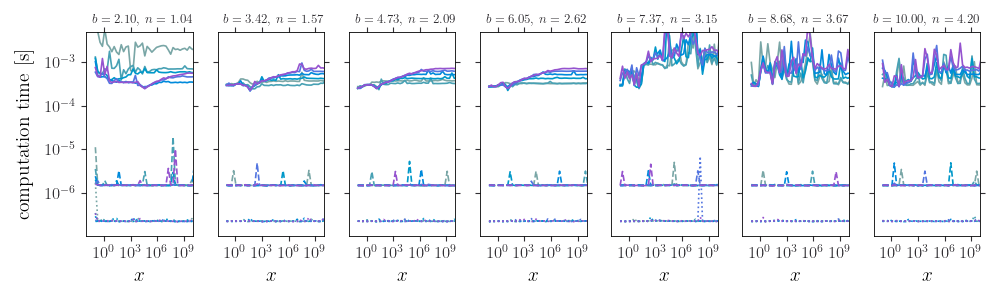

In [6]:
fig, axs = plt.subplots(1, 7, figsize=(10, 3))

df_vGM['cond_ratio'] = df_vGM['aq_cond'] / df_vGM['cl_cond']
cond_ratio = df_vGM['cond_ratio'].unique()
b = df_vGM['b'].unique()

for i1, v1 in enumerate(b):
    for i2, v2 in enumerate(cond_ratio):

        idx = np.logical_and(df_vGM['b'] == v1, df_vGM['cond_ratio'] == v2)

        axs[i1].plot(df_vGM.loc[idx, 'x'], df_vGM.loc[idx, 'dt_ex'], 
                     ls='-', c=col_vGM[i2], zorder=0)
        axs[i1].plot(df_vGM.loc[idx, 'x'], df_vGM.loc[idx, 'dt_ap'], 
                     ls='--', c=col_vGM[i2], zorder=0)
        axs[i1].plot(df_vGM.loc[idx, 'x'], df_vGM.loc[idx, 'dt_mf'], 
                     ls=':', c=col_vGM[i2], zorder=0)


for i1 in range(7):
    axs[i1].spines["top"].set_visible(True)
    axs[i1].spines["right"].set_visible(True)
    axs[i1].tick_params(top=True, right=True)
    axs[i1].set(xscale='log', yscale='log')
    axs[i1].minorticks_off()
    axs[i1].set_xlabel('$x$', labelpad=5)
    axs[i1].set_xlim(xmin=1e-2, xmax=1e10)
    axs[i1].set_xticks([1e0, 1e3, 1e6, 1e9])
    axs[i1].set_ylim(ymin=1e-7, ymax=5e-3)
    axs[i1].set_yticks([1e-6, 1e-5, 1e-4, 1e-3], labels=[])
    axs[i1].set_title(f'$b = {b[i1]:.2f}$, $n = {(2*b[i1]+1)/5:.2f}$', fontsize=9)
axs[0].set_ylabel('computation time [s]', labelpad=8)
axs[0].set_yticklabels(['$10^{-6}$', '$10^{-5}$', '$10^{-4}$', '$10^{-3}$'])

plt.tight_layout()
#plt.savefig(output_path / 'q0_approx_time_vGM.pdf')

#### Brooks - Corey - Burdine

In [7]:
# load data
df_BCB = pd.read_csv('exp3_BCB/rates.csv', index_col=0)

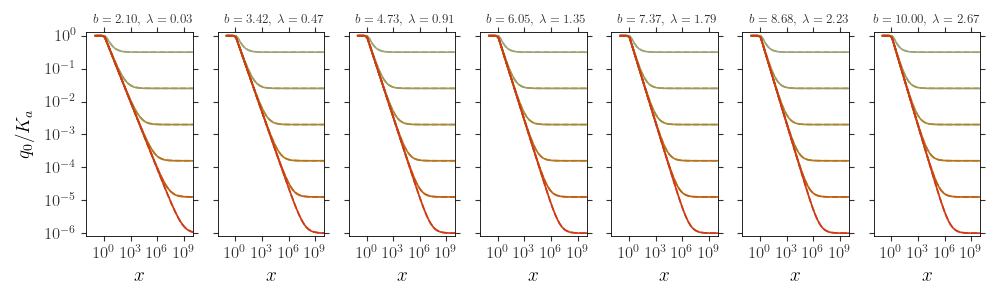

In [8]:
fig, axs = plt.subplots(1, 7, figsize=(10, 3))

df_BCB['cond_ratio'] = df_BCB['aq_cond'] / df_BCB['cl_cond']
cond_ratio = df_BCB['cond_ratio'].unique()
b = df_BCB['b'].unique()

for i1, v1 in enumerate(b):
    for i2, v2 in enumerate(cond_ratio):

        idx = np.logical_and(df_BCB['b'] == v1, df_BCB['cond_ratio'] == v2)

        axs[i1].plot(df_BCB.loc[idx, 'x'], df_BCB.loc[idx, 'q0_ex'], 
                     ls='-', c=col_BCB[i2], zorder=0)
        axs[i1].plot(df_BCB.loc[idx, 'x'], df_BCB.loc[idx, 'q0_ap'], 
                     ls='--', c=col_BCB[i2], zorder=0)


for i1 in range(7):
    axs[i1].spines["top"].set_visible(True)
    axs[i1].spines["right"].set_visible(True)
    axs[i1].tick_params(top=True, right=True)
    axs[i1].set(xscale='log', yscale='log')
    axs[i1].minorticks_off()
    axs[i1].set_ylim(ymin=8e-7, ymax=1.3)
    axs[i1].set_yticks([1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1e0], labels=[])
    axs[i1].set_xlim(xmin=1e-2, xmax=1e10)
    axs[i1].set_xticks([1e0, 1e3, 1e6, 1e9])
    axs[i1].set_xlabel('$x$', labelpad=5)
    axs[i1].set_title(f'$b = {b[i1]:.2f}$, $\\lambda = {(b[i1]-2)/3:.2f}$',
                      fontsize=9)
axs[0].set_ylabel('$q_0 / K_a$', labelpad=8)
axs[0].set_yticklabels(['$10^{-6}$', '$10^{-5}$', '$10^{-4}$', '$10^{-3}$',
                        '$10^{-2}$', '$10^{-1}$', '$10^0$'])

plt.tight_layout()
#plt.savefig(output_path / 'q0_approx_BCB.pdf')

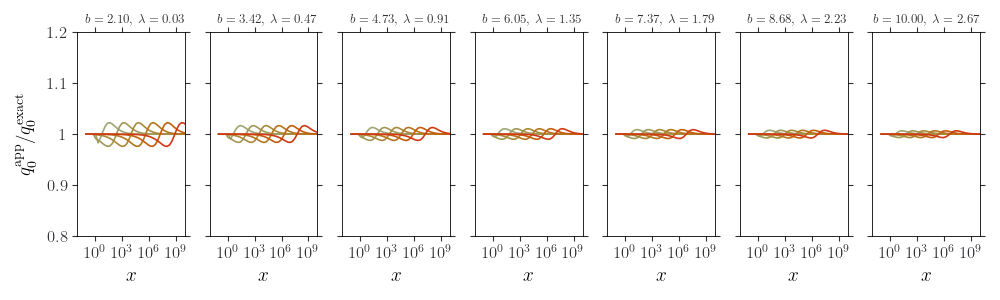

In [9]:
fig, axs = plt.subplots(1, 7, figsize=(10, 3))

df_BCB['cond_ratio'] = df_BCB['aq_cond'] / df_BCB['cl_cond']
cond_ratio = df_BCB['cond_ratio'].unique()
b = df_BCB['b'].unique()

for i1, v1 in enumerate(b):
    for i2, v2 in enumerate(cond_ratio):

        idx = np.logical_and(df_BCB['b'] == v1, df_BCB['cond_ratio'] == v2)

        y = df_BCB.loc[idx, 'q0_ap'] / df_BCB.loc[idx, 'q0_ex']
        axs[i1].plot(df_BCB.loc[idx, 'x'], y, ls='-', c=col_BCB[i2])

for i1 in range(7):
    axs[i1].spines["top"].set_visible(True)
    axs[i1].spines["right"].set_visible(True)
    axs[i1].tick_params(top=True, right=True)
    axs[i1].set(xscale='log', yscale='linear')
    axs[i1].minorticks_off()
    axs[i1].set_xlabel('$x$', labelpad=5)
    axs[i1].set_xlim(xmin=1e-2, xmax=1e10)
    axs[i1].set_xticks([1e0, 1e3, 1e6, 1e9])
    axs[i1].set_ylim(ymin=0.8, ymax=1.2)
    axs[i1].set_yticks([0.8, 0.9, 1, 1.1, 1.2], labels=[])
    axs[i1].set_title(f'$b = {b[i1]:.2f}$, $\\lambda = {(b[i1]-2)/3:.2f}$',
                      fontsize=9)
axs[0].set_ylabel('$q_0^\\mathrm{app} / q_0^\\mathrm{exact}$', labelpad=8)
axs[0].set_yticklabels([0.8, 0.9, 1, 1.1, 1.2])

plt.tight_layout()
#plt.savefig(output_path / 'q0_approx_error_BCB.pdf')

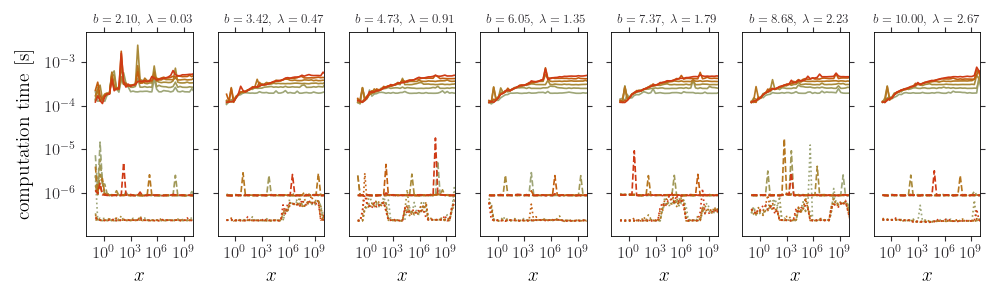

In [10]:
fig, axs = plt.subplots(1, 7, figsize=(10, 3))

df_BCB['cond_ratio'] = df_BCB['aq_cond'] / df_BCB['cl_cond']
cond_ratio = df_BCB['cond_ratio'].unique()
b = df_BCB['b'].unique()

for i1, v1 in enumerate(b):
    for i2, v2 in enumerate(cond_ratio):

        idx = np.logical_and(df_BCB['b'] == v1, df_BCB['cond_ratio'] == v2)

        axs[i1].plot(df_BCB.loc[idx, 'x'], df_BCB.loc[idx, 'dt_ex'], 
                     ls='-', c=col_BCB[i2], zorder=0)
        axs[i1].plot(df_BCB.loc[idx, 'x'], df_BCB.loc[idx, 'dt_ap'], 
                     ls='--', c=col_BCB[i2], zorder=0)
        axs[i1].plot(df_BCB.loc[idx, 'x'], df_BCB.loc[idx, 'dt_mf'], 
                     ls=':', c=col_BCB[i2], zorder=0)


for i1 in range(7):
    axs[i1].spines["top"].set_visible(True)
    axs[i1].spines["right"].set_visible(True)
    axs[i1].tick_params(top=True, right=True)
    axs[i1].set(xscale='log', yscale='log')
    axs[i1].minorticks_off()
    axs[i1].set_xlabel('$x$', labelpad=5)
    axs[i1].set_xlim(xmin=1e-2, xmax=1e10)
    axs[i1].set_xticks([1e0, 1e3, 1e6, 1e9])
    axs[i1].set_ylim(ymin=1e-7, ymax=5e-3)
    axs[i1].set_yticks([1e-6, 1e-5, 1e-4, 1e-3], labels=[])
    axs[i1].set_title(f'$b = {b[i1]:.2f}$, $\\lambda = {(b[i1]-2)/3:.2f}$',
                      fontsize=9)
axs[0].set_ylabel('computation time [s]', labelpad=8)
axs[0].set_yticklabels(['$10^{-6}$', '$10^{-5}$', '$10^{-4}$', '$10^{-3}$'])

plt.tight_layout()
#plt.savefig(output_path / 'q0_approx_time_BCB.pdf')